# Multi-Class Classification

In the previous lectures we learned about how to use logistic regression to perform a binary classification. In many real life situations, we actually need to classify data into multiple classes.

For this series of lectures, we'll go through the following steps:

1. Introduction to the Iris Data Set
2. Introduction to Multi-Class Classification (Logistic Regression)
3. Data Formatting
4. Data Visualization Analysis
5. Multi-Class Classification with Sci Kit Learn
6. Explanation of K Nearest Neighbors
7. K Nearest Neighbors with Sci Kit Learn
8. Conclusion


Let's get started!

### Step 1: Introduction to the Iris Data Set
For this series of lectures, we will be using the famous [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

Here's a picture of the three different Iris types:

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

* Iris-setosa (n=50)
* Iris-versicolor (n=50)
* Iris-virginica (n=50)

The four features of the Iris dataset:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

Here's a picture describing the petals and the sepals.

In [ ]:
# The Iris Sepals and Petals
from IPython.display import Image
url = 'http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png'
Image(url,width=300, height=300)

### Step 2: Introduction to Multi-Class Classification
In this section we will learn how to use multi-class classification with SciKit Learn to seperate data into multiple classes.

We will first use SciKit Learn to implement a strategy known as one vs all (sometimes called one vs rest) to perform multi-class classification. This method works by basically performing a logistic regression for binary classification for each possible class. The class that is then predicted with the highest confidence is assigned to that data point. For a great visual explanation of this, here is Andrew Ng's quick explanation of how one-vs-rest works.

### Step 3: Data Formatting
After we use the one-vs-all logistic regression method, we will use k nearest neighbors method to classify the data. For now, let's go ahead and start with our imports.)

In [6]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn import linear_model
from sklearn.datasets import load_iris

In [7]:
# Import the data
iris = load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
# Grab data
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

# Grab Target
iris_target = DataFrame(Y,columns=['Species'])

In [13]:
def flower(num):
    ''' Takes in numerical class, returns flower name'''
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

# Apply
iris_target['Species'] = iris_target['Species'].apply(flower)

In [15]:
#Check
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [16]:
# Create a combined Iris DataSet
iris = pd.concat([iris_data,iris_target],axis=1)

# Preview all data
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Step 4: Data Visualization Analysis
Let's do some quick visualizations of the data. We can actually do a very broad and quick birds eye view with seaborn's pairplot.

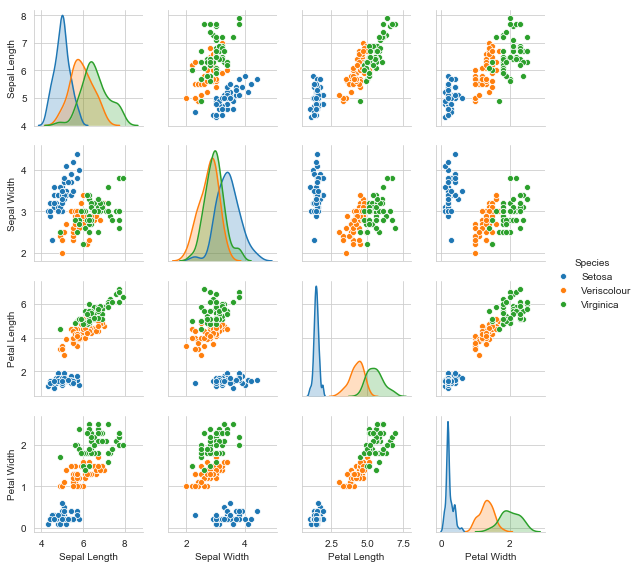

In [20]:
# First a pairplot of all the different features
sns.pairplot((iris),hue='Species',height=2) # height=2 size

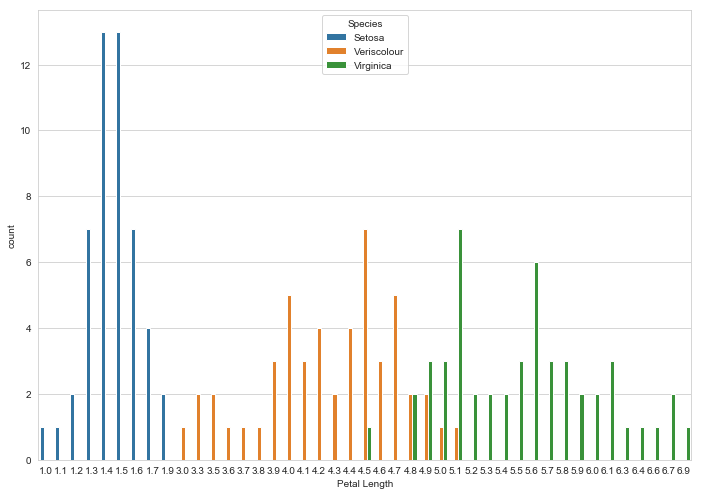

In [27]:
# decide size
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

# plot
sns.countplot('Petal Length',data=iris,hue='Species')

### Step 5: Multi-Class Classification with Sci Kit Learn
Let's go ahead and start using SciKit Learn to perform a Multi-Class Classification using Logistic Regression Techniques.

We already have X and Y defined as the Data Features and Target so let's go ahead and continue with those arrays. We will then have to split the data into Testing and Training sets. I'll pass a test_size argument to have the testing data be 40% of the total data set. I'll also pass a random seed number.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
# import logistic regression
logreg = LogisticRegression()

# split into trainning set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)

In [39]:
# fit the logistic regressor
logreg.fit(X_train,Y_train)

from sklearn import metrics
Y_pred = logreg.predict(X_test)
print (metrics.accuracy_score(Y_test,Y_pred))

0.9333333333333333


C:\Users\traffic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\traffic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Looks like our model had almost 93% accuracy. (Note: this could change from run to run due to the random splitting) Should we trust this level of accuracy? I encourage you to figure out ways to intuitively understand this result. Try looking at the PairPlot again and check to see how separate the data features initially were. Also try changing the test_size parameter and check how that effects the outcome. In conclusion, given how clean the data is and how seperated some of the features are, we should expect pretty high accuracy.

Now let's see how to use K-Nearest Neighbors to implement Multi-Class Classification!

### K Nearest Neighbors with Sci Kit Learn
Let's start with a basic overview of the [K-Nearest Neighbors Algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). The premise of the algorithm is actually quite simple. Given an object to be assigned to a class in a feature space, select the class that is "nearest" to the negihbors in the training set. This 'nearness" is a distance metric, which is usually a Euclidean distance.

The k-nearest neighbor (kNN) algorithm is very well explained in the following two videos. The ifrst one is a quick overall explanation and the second one is an MIT OpenCourse Lecture on the topic. I encourage you to check them both out. Following the videos I'll have an in Notebook explnation of the algorithm.

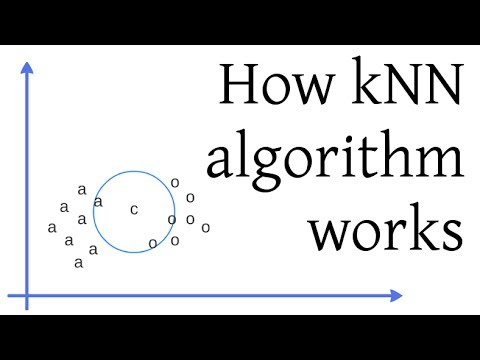

In [43]:
# Short Explanation
from IPython.display import YouTubeVideo
YouTubeVideo('UqYde-LULfs')

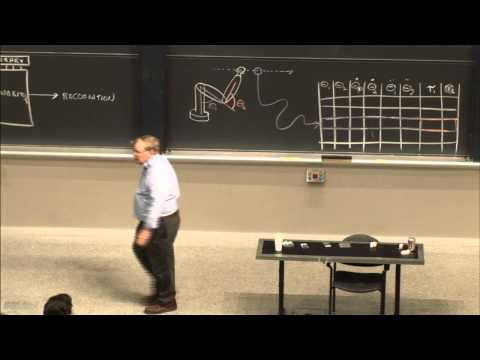

In [44]:
# MIT Lecture
YouTubeVideo('09mb78oiPkA')

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# We'll first start with k=6
# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


Looks like using k=6 got us around 95% accuracy. Let's see what happens if we reduce that value to k=1, that means the closest point in the feature space to our testing data point will be the class the testing point joins.

In [41]:
# Import the kNeighbors Classifiers
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)
print (metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667



Looks like using k=1 got us around 96% accuracy. How about we cycle through various k values and find the optimal value.

In [49]:
k_range = range(1,21)

accuracy = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))
accuracy

[0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95,
 0.9333333333333333,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9333333333333333,
 0.9333333333333333,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.9666666666666667,
 0.95,
 0.95,
 0.95]

Text(0, 0.5, 'Testing Accuracy')

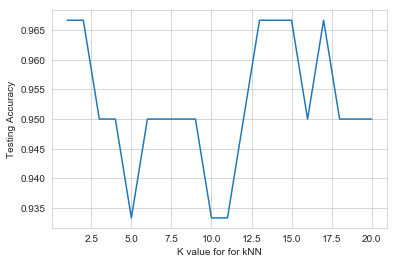

In [51]:
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

Interesting! Try changing the way Sci Kit Learn split the training and Testing data sets and try re-running this analysis. What changed?

### Step 8: Conclusion

We've learned how to perform Multi-Class Classification using two great techniques, Logistic Regression and k-Nearest Neighbors.

Here are several more resources for you to Explore:

1. [Wikipedia on Multiclass Classification](https://en.wikipedia.org/wiki/Multiclass_classification)

2. [MIT Lecture Slides on MultiClass Classification](http://www.mit.edu/~9.520/spring09/Classes/multiclass.pdf)

3. [Sci Kit Learn Documentation](https://scikit-learn.org/stable/modules/multiclass.html)

4. [DataRobot on Classification Techniques](http://www.datarobot.com/blog/classification-with-scikit-learn/)